In [ ]:
import os, json
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf

In [146]:
def load_data_by_annotation_file_name(file_name):
    downloads_path = r"E:\Downloads\datasets\annotations_trainval2017\annotations"
    captions_path = os.path.join(downloads_path,file_name)
    
    with open(captions_path, "r", encoding="utf-8") as f:
        captions_data = json.load(f)
    return captions_data

In [147]:
def make_img_id_to_captions_data(captions_data):
    captions_dict = {}
    for ann in captions_data["annotations"]:
        image_id = ann["image_id"]
        if image_id not in captions_dict.keys():
            captions_dict[image_id] = [ann["caption"]]
        else:
            captions_dict[image_id].append(ann["caption"])
    return captions_dict

In [148]:
def plot_caption_length_distribution(data):
    lengths = [len(img['caption'].split()) for img in data['annotations']]
    
    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='salmon', edgecolor='black', alpha=0.8)
    plt.title("Distribution of Caption Lengths", fontsize=16, fontweight='bold', pad=15)
    plt.xlabel("Caption Length (words)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [149]:
def plot_histogram_of_widths_heights_of_images(data):
    visited = set()
    widths = []
    heights = []
    for img in data["images"]:
        img_id = img['id']
        if img_id not in visited:
            widths.append(img['width'])
            heights.append(img['height'])
            visited.add(img_id)

    plt.figure(figsize=(8, 5))
    plt.hist(widths, bins=25, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title("Distribution of Image Widths", fontsize=16, fontweight='bold', pad=15)
    plt.xlabel("Image Width (pixels)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(8, 5))
    plt.hist(heights, bins=25, color='skyblue', edgecolor='black', alpha=0.8)
    plt.title("Distribution of Image Heights", fontsize=16, fontweight='bold', pad=15)
    plt.xlabel("Image Width (pixels)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [150]:
def plot_caption_length_distribution(data):
    lengths = [len(img['caption'].split()) for img in data['annotations']]
    
    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='salmon', edgecolor='black', alpha=0.8)
    plt.title("Distribution of Caption Lengths", fontsize=16, fontweight='bold', pad=15)
    plt.xlabel("Caption Length (words)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [151]:
def plot_random_6_images_from_dataset(data, id_to_captions):
    random_imgs_info = random.sample(data["images"], 6)
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))
    fig.suptitle("6 Random COCO Images with Captions", fontsize=16)

    train_images_path = r"E:\Downloads\datasets\train2017\train2017"
    val_images_path = r"E:\Downloads\datasets\val2017\val2017"
    
    for ax, img_info in zip(axes.flatten(), random_imgs_info):
        img_id = img_info["id"]
        img_file = img_info["file_name"]
    
        image_path = os.path.join(train_images_path, img_file)
    
        if not os.path.exists(image_path):
            image_path = os.path.join(val_images_path, img_file)
    
        # Load and show image
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')
    
        captions = id_to_captions.get(img_id, [])
        title = captions[0] if captions else "No caption available"
        ax.set_title(title, fontsize=10)

    plt.tight_layout()
    plt.show()
    
    for img_info in random_imgs_info:
        img_id = img_info["id"]
        img_file = img_info["file_name"]
        print(f"\n {img_file} (Image ID: {img_id})")
        for cap in id_to_captions.get(img_id, []):
            print("  -", cap)


# Training Data Visualization

In [152]:
train_data = load_data_by_annotation_file_name("captions_train2017.json")
print("Number of images in train data: ", len(train_data['images']))
print("Number of captions in train data: ", len(train_data['annotations']), "\n")

image_id_to_captions = make_img_id_to_captions_data(train_data)

Number of images in train data:  118287
Number of captions in train data:  591753 



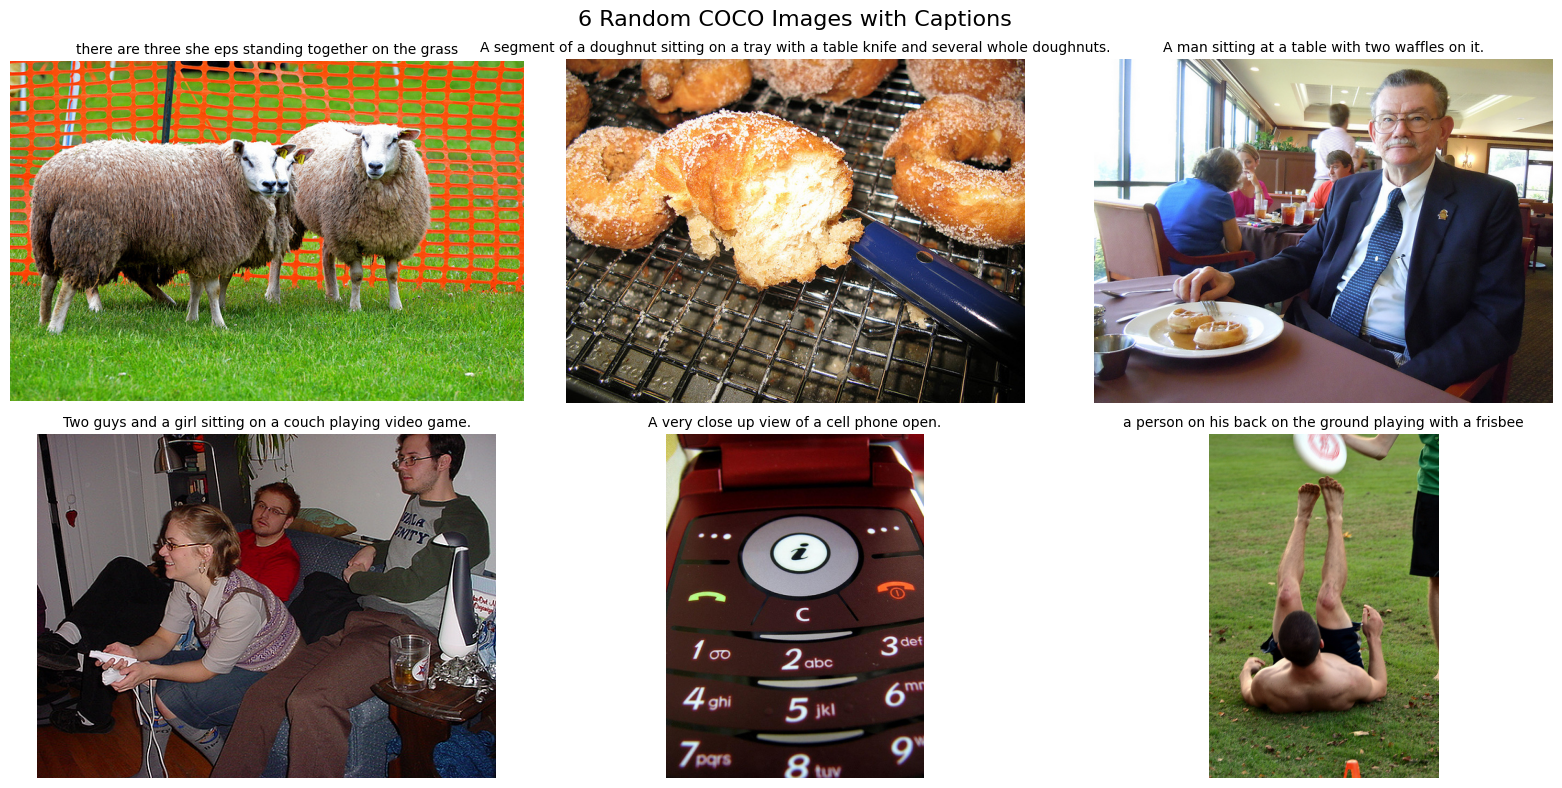


 000000000772.jpg (Image ID: 772)
  - there are three she eps standing together on the grass
  - Heavily woolen sheep standing near orange netting in grassy field.
  - Two sheep stand next to a fence on grass.
  - A herd of sheep standing on a lush green field.
  - A group of sheep standing in the grass.

 000000480729.jpg (Image ID: 480729)
  - A segment of a doughnut sitting on a tray with a table knife and several whole doughnuts.
  - Some sugary donuts are on a metal grill.
  - Donuts on a grill with one being scooped up 
  - A bitten doughnut with other sprinkled doughnuts beside it.
  - some sugar donuts sitting on a tray with a knife 

 000000396385.jpg (Image ID: 396385)
  - A man sitting at a table with two waffles on it.
  - A man sitting at a table in a restaurant eating waffles.
  - a man sitting down with a plate with two food items on it.
  - An old man with eyeglasses having a plate of donuts on his table
  - A man in a suit eats waffles while a group of people eat in t

In [153]:
plot_random_6_images_from_dataset(train_data, image_id_to_captions)

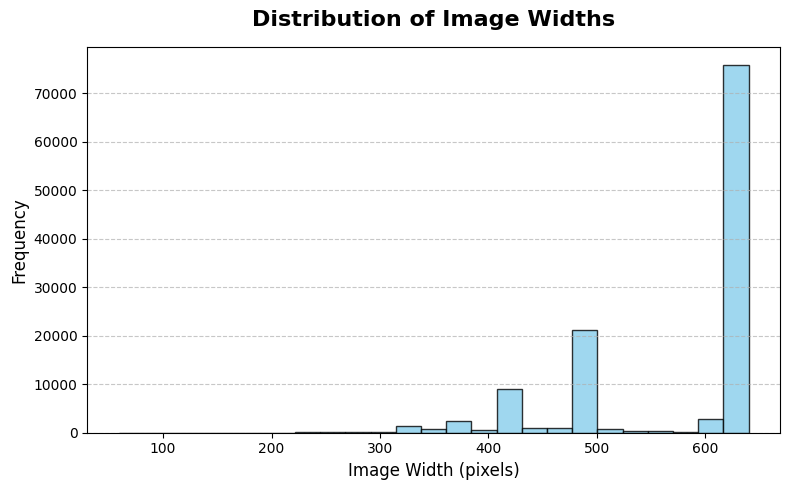

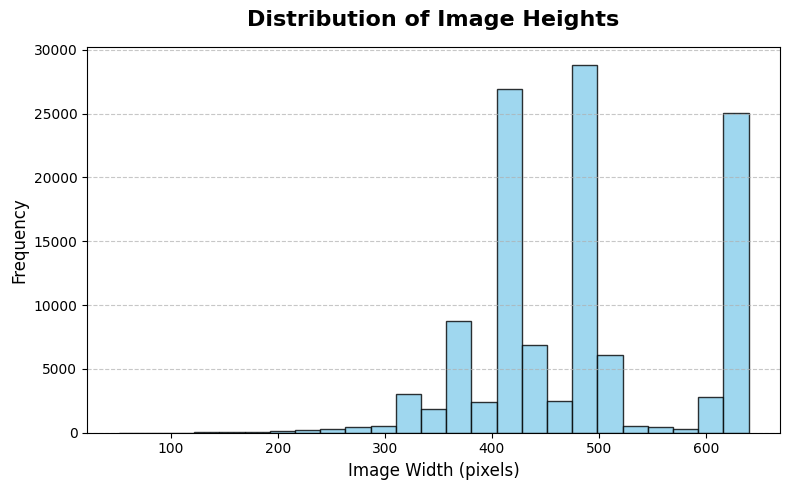

In [154]:
plot_histogram_of_widths_of_images(train_data)

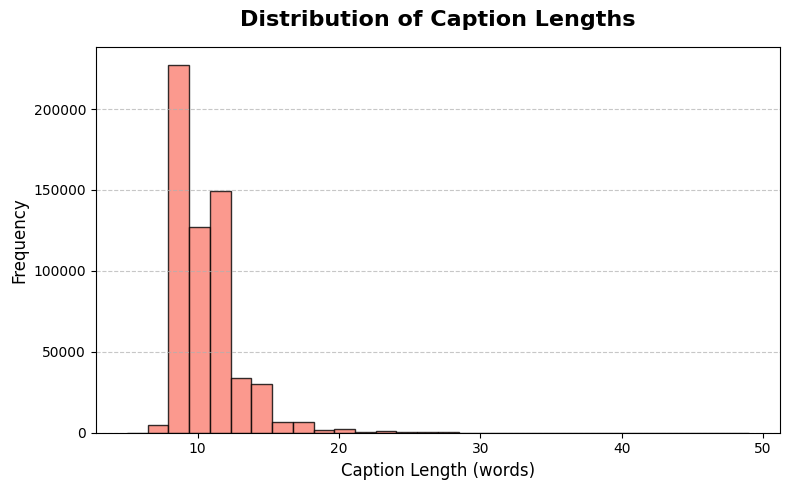

In [155]:
plot_caption_length_distribution(train_data)

# Validation Data Visualization

In [156]:
val_data = load_data_by_annotation_file_name("captions_val2017.json")
print("Number of images in validation data: ", len(val_data['images']))
print("Number of captions in validation data: ", len(val_data['annotations']))

image_id_to_captions = make_img_id_to_captions_data(val_data)

Number of images in validation data:  5000
Number of captions in validation data:  25014


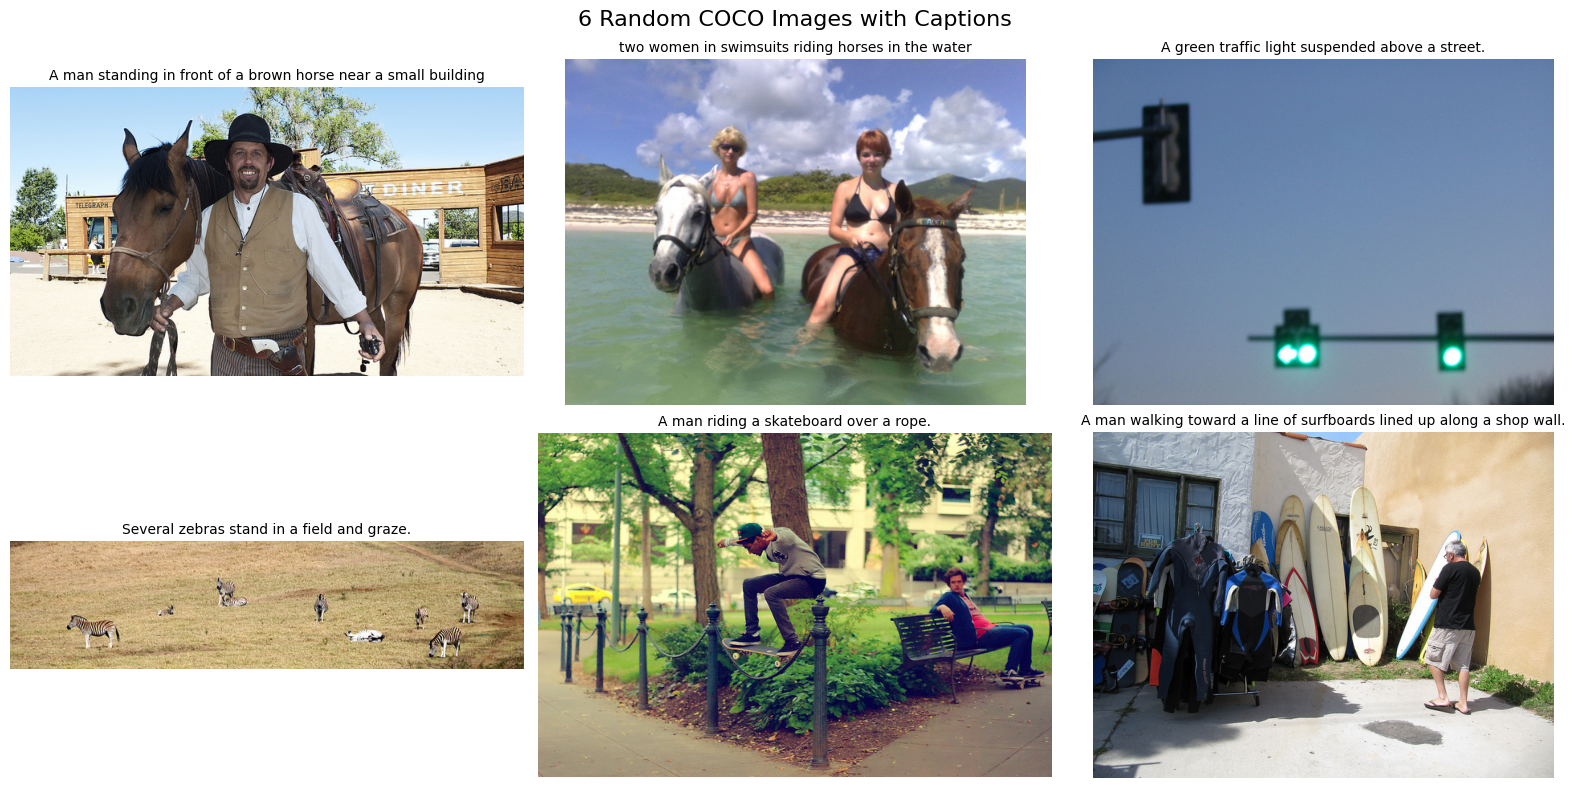


 000000488251.jpg (Image ID: 488251)
  - A man standing in front of a brown horse near a small building
  - A man posing with a horse in the shade 
  - a man in a black hat standing next to and  holding the reigns of a horse
  - A man is posing for a picture while holding the reigns
  - A man in a black hat posing with his horse.

 000000206838.jpg (Image ID: 206838)
  - two women in swimsuits riding horses in the water
  - Two bikini clad women riding horses in an ocean
  - Two women in bikinis on horses stand in the ocean.
  - Two beautiful women riding horses in the ocean in bikinis.
  - people riding horses partially submerged in a body of water

 000000430875.jpg (Image ID: 430875)
  - A green traffic light suspended above a street.
  - A double traffic signal shows three green lights.
  - Two green lit traffic lights with a blue sky behind them.
  - Green lights a shining bright against a cool blue sky.
  - The traffic lights glow green in the night sky.

 000000298251.jpg (Imag

In [157]:
plot_random_6_images_from_dataset(val_data,image_id_to_captions) 

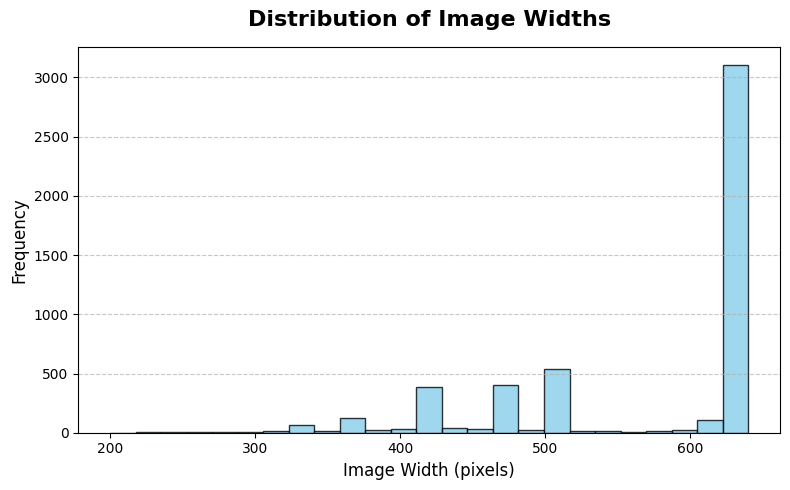

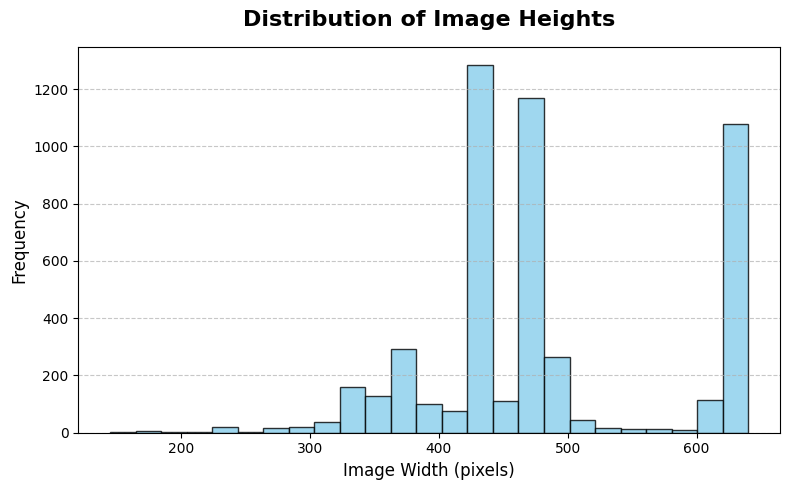

In [158]:
plot_histogram_of_widths_heights_of_images(val_data)

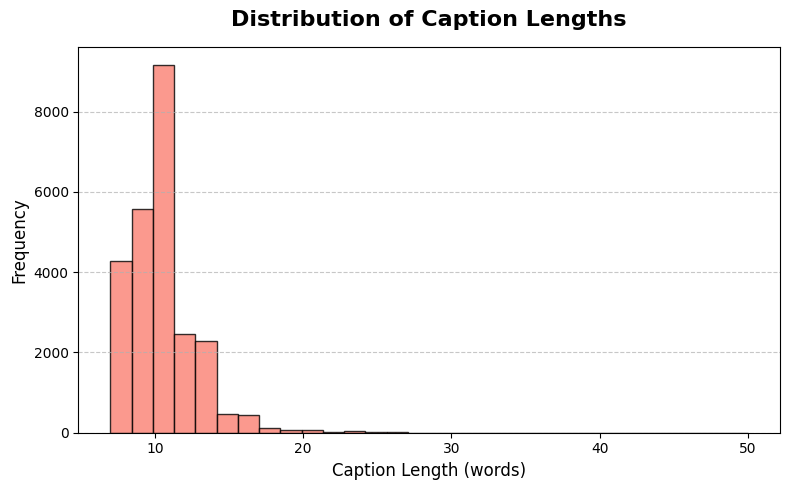

In [159]:
plot_caption_length_distribution(val_data)

# Make vocabulary

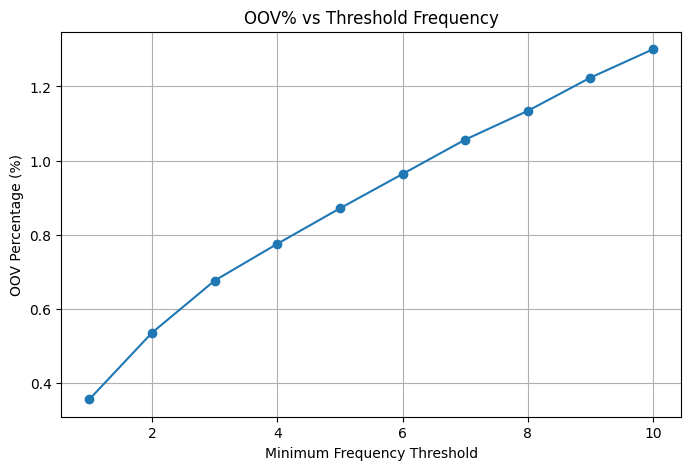

In [160]:
train_captions = [ann['caption'] for ann in train_data['annotations']]
val_captions   = [ann['caption'] for ann in val_data['annotations']]

word_counts = Counter()
for caption in train_captions:
    for word in caption.lower().split():
        word_counts[word] += 1

def compute_oov_percent(threshold):
    vocab = {word for word, freq in word_counts.items() if freq >= threshold}
    
    total_words = 0
    oov_words = 0
    for caption in val_captions:
        for word in caption.lower().split():
            total_words += 1
            if word not in vocab:
                oov_words += 1
    
    return (oov_words / total_words) * 100

thresholds = range(1, 11)
oov_percents = [compute_oov_percent(t) for t in thresholds]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, oov_percents, marker='o')
plt.title("OOV% vs Threshold Frequency")
plt.xlabel("Minimum Frequency Threshold")
plt.ylabel("OOV Percentage (%)")
plt.grid()
plt.show()

- *From graph we select thresold equal to 8*

In [161]:
train_captions = [ann['caption'] for ann in train_data['annotations']]

word_counts = Counter()
for caption in train_captions:
    for word in caption.lower().split():
        word_counts[word] += 1

vocab = [word for word, freq in word_counts.items() if freq >= 8]

filtered_captions = []
for caption in train_captions:
    filtered_words = [
        word for word in caption.lower().split()
        if word_counts[word] >= 8
    ]
    filtered_captions.append("<SOS> " + " ".join(filtered_words) + " <EOS>")

print(filtered_captions[0])

tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(filtered_captions)

<SOS> a bicycle replica with a clock as the front wheel. <EOS>


In [144]:
word_to_vector = {}
with open("glove.6B.300d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        word_to_vector[word] = vector

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300
embedding_matrix = np.random.normal(size=(vocab_size, embedding_dim))

for word, idx in tokenizer.word_index.items():
    if word in embedding_index:
        embedding_matrix[idx] = word_to_vector[word]

[[1], [4929], [3905], [3905], [2632]]


In [168]:
sequences = tokenizer.texts_to_sequences(filtered_caption)
pad_sequences = tf.keras.utils.pad_sequences(sequences,maxlen=20,padding='post')